<a href="https://colab.research.google.com/github/s2li2/AIDL/blob/main/CNN_model_codeURL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/healthy')))
print(len(os.listdir('/content/drive/MyDrive/train/diseased')))
print(len(os.listdir('/content/drive/MyDrive/test/healthy')))
print(len(os.listdir('/content/drive/MyDrive/test/diseased')))

1550
1550
472
472


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 2480 images belonging to 2 classes.
Found 620 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
78/78 [==============================] - 766s 10s/step - loss: 2.7164 - accuracy: 0.6895 - val_loss: 11.4163 - val_accuracy: 0.4919
Epoch 2/30
78/78 [==============================] - 517s 7s/step - loss: 1.3336 - accuracy: 0.7133 - val_loss: 2.9055 - val_accuracy: 0.5790
Epoch 3/30
78/78 [==============================] - 505s 6s/step - loss: 0.8220 - accuracy: 0.7077 - val_loss: 0.4059 - val_accuracy: 0.9452
Epoch 4/30
78/78 [==============================] - 503s 6s/step - loss: 0.7233 - accuracy: 0.7323 - val_loss: 0.2503 - val_accuracy: 0.9177
Epoch 5/30
78/78 [==============================] - 499s 6s/step - loss: 0.7474 - accuracy: 0.7367 - val_loss: 5.0170 - val_accuracy: 0.7468
Epoch 6/30
78/78 [==============================] - 502s 6s/step - loss: 0.6295 - accuracy: 0.7339 - val_loss: 0.6449 - val_accuracy: 0.9339
Epoch 7/30
78/78 [==============================] - 493s 6s/step - loss: 0.5008 - accuracy: 0.7657 - val_loss: 0.3086 - val_accuracy: 0.9726
Epoch 8/30


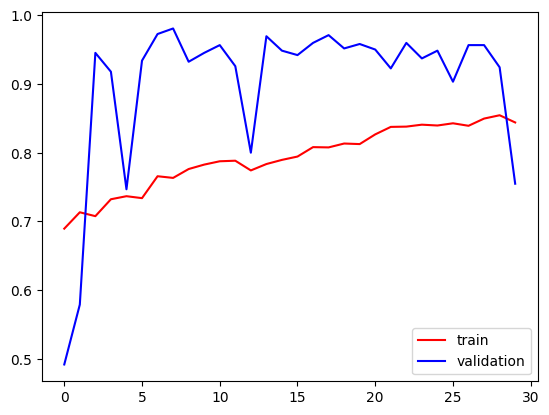

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

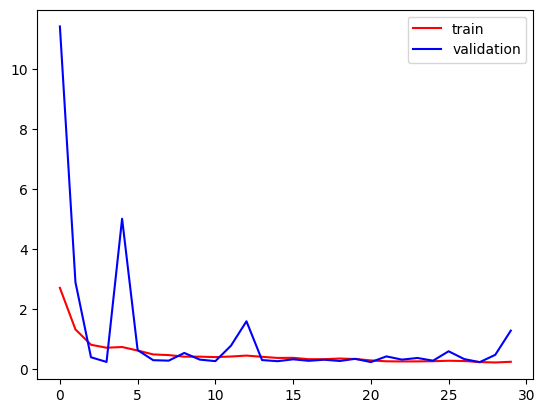

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 944 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

30/30 [==============================] - 197s 7s/step
[[5.01167595e-01]
 [6.05469584e-01]
 [2.80971706e-01]
 [9.49849606e-01]
 [4.71502766e-02]
 [9.43699121e-01]
 [1.50079867e-02]
 [8.13489974e-01]
 [2.12718805e-05]
 [6.66822016e-01]
 [3.11163824e-33]
 [9.99681711e-01]
 [4.96891499e-01]
 [9.61589992e-01]
 [0.00000000e+00]
 [9.95713472e-01]
 [0.00000000e+00]
 [9.21073616e-01]
 [0.00000000e+00]
 [8.81119847e-01]
 [9.08637345e-01]
 [9.55016732e-01]
 [0.00000000e+00]
 [9.82079983e-01]
 [6.68777049e-01]
 [2.46217832e-01]
 [5.01167595e-01]
 [0.00000000e+00]
 [9.95411396e-01]
 [5.01167595e-01]
 [8.99954915e-01]
 [0.00000000e+00]
 [9.20957685e-01]
 [9.99666929e-01]
 [2.38871351e-02]
 [3.94171983e-01]
 [5.43090794e-03]
 [4.73152761e-09]
 [9.99999642e-01]
 [9.20015454e-01]
 [8.49788189e-01]
 [0.00000000e+00]
 [9.99960244e-01]
 [0.00000000e+00]
 [9.97856438e-01]
 [9.99404311e-01]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [9.98875022e-01]
 [9.92718935e-01]
 [9.947052

In [13]:
len(predictions)

944

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[251 221]
 [265 207]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51       472
           1       0.48      0.44      0.46       472

    accuracy                           0.49       944
   macro avg       0.49      0.49      0.48       944
weighted avg       0.49      0.49      0.48       944

